# Tutorial 2

# Unsupervised Learning Using Pycaret

### Name: Your Name:ABHIJEET CHOUDHARI
### Library: PyCaret
### URL: https://pycaret.readthedocs.io/en/latest/
### Description:
PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows"""

**Module:** Clustering Module in Pycaret
PyCaret’s Clustering Module is an unsupervised machine learning module that performs the task of grouping a set of objects in such a way that objects in the same group (also known as a cluster) are more similar to each other than to those in other groups.

***A typical workflow in PyCaret's unsupervised module consist of following 6 steps in this order:***

Setup ➡️ Create Model ➡️ Assign Labels ➡️ Analyze Model ➡️ Prediction ➡️ Save Model

In [ ]:
!pip install pycaret
import pycaret
pycaret.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.5 

'3.3.0'

##  Dataset Loading

In [ ]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('jewellery')
data_train = data.sample(frac=.7,random_state= 123)
data_test = data.sample(frac=0.3,random_state =123)

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


# Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes only one required parameter: data. All the other parameters are optional.

In [ ]:
# import pycaret clustering and init setup
!pip install mlflow
import mlflow


In [ ]:
from pycaret.clustering import *
s = setup(data_train, session_id = 123, log_experiment= True, normalize= True)

,Description,Value
0,Session id,123
1,Original data shape,"(354, 4)"
2,Transformed data shape,"(354, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


Once the setup has been successfully executed it shows the information grid containing experiment level information.

**Session id**: A pseudo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions.

**Original data shape**: Shape of the original data prior to any transformations.

**Transformed data shape**: Shape of data after transformations

**Numeric features** : The number of features considered as numerical.

**Categorical features** : The number of features considered as categorical

In [ ]:
# import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.clustering.oop.ClusteringExperiment

# Create Model

In [ ]:
# train kmeans model

kmeans = create_model('kmeans')
print(kmeans)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7568,1072.4934,0.3939,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=4, random_state=123)


In [ ]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
kmeans3 = create_model('kmeans', num_clusters= 5)
evaluate_model(kmeans3)
print(kmeans3)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8110,2746.5681,0.2675,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

KMeans(n_clusters=5, random_state=123)


In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [ ]:
kmeans2 = create_model('ap')
print(kmeans2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8110,2746.5681,0.2675,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

AffinityPropagation()


In [ ]:
evaluate_model(kmeans2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

In [ ]:
exp_logs2 = get_logs()
pull()

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.811,2746.5681,0.2675,0,0,0


# Assigned Model

In [ ]:
kmeans_cluster = assign_model(kmeans3)
kmeans_cluster

,Age,Income,SpendingScore,Savings,Cluster
372,88,22602,0.356745,16740.343750,Cluster 1
310,85,21250,0.310410,16033.970703,Cluster 1
444,22,109152,0.323446,16022.482422,Cluster 0
421,39,100661,0.376641,16873.128906,Cluster 0
429,89,22008,0.381906,16458.398438,Cluster 1
...,...,...,...,...,...
206,60,67491,0.846618,7180.713867,Cluster 2
8,83,34384,0.324719,14783.378906,Cluster 1
77,59,72588,0.801716,6300.843750,Cluster 2
58,87,23322,0.306821,16131.267578,Cluster 1


# Analyse the Model
You can use the plot_model function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

In [ ]:
# plot pca cluster plot
plot_model(kmeans3, plot = 'cluster')


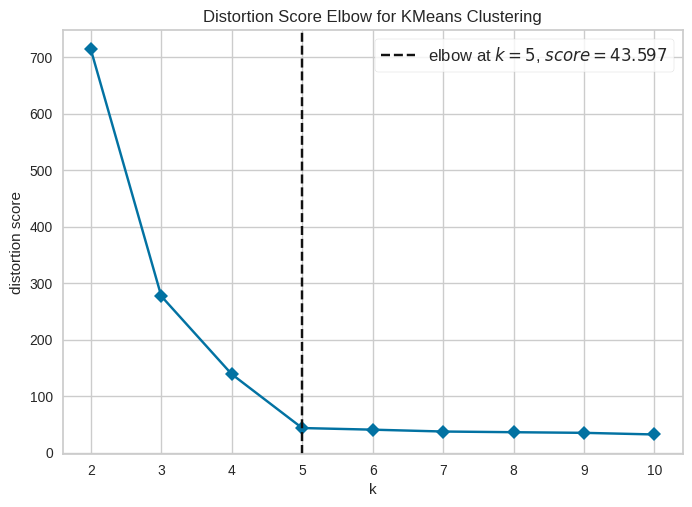

In [ ]:
# plot elbow
plot_model(kmeans3, plot = 'elbow')

In [ ]:
evaluate_model(kmeans3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Prediction

The predict_model function returns Cluster label as a new column in the input dataframe.predict_model is only useful when you want to obtain cluster labels on unseen data (i.e. data that was not used during training the model


In [ ]:

# predict on test set
kmeans_pred = predict_model(kmeans3, data=data_test)
kmeans_pred

,Age,Income,SpendingScore,Savings,Cluster
372,1.175861,-1.465122,-0.558845,0.982373,Cluster 1
310,1.051668,-1.502508,-0.738290,0.840189,Cluster 1
444,-1.556393,0.928191,-0.687803,0.837877,Cluster 0
421,-0.852631,0.693394,-0.481791,1.009101,Cluster 0
429,1.217259,-1.481548,-0.461401,0.925621,Cluster 1
...,...,...,...,...,...
91,0.016723,0.121212,1.204669,-1.405092,Cluster 2
150,-0.024675,-0.215816,0.857835,-1.038309,Cluster 2
320,1.134463,-1.758292,-0.612111,0.869636,Cluster 1
471,-1.183813,0.708548,-0.761864,1.018046,Cluster 0


In [ ]:
save_model(kmeans3, 'saved_kmeans_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Income', 'SpendingScore',
                                              'Savings'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model', KMeans(n_clusters=5, random_state=123))]),
 'saved_kmeans_model.pkl')

# Log experiments

In [ ]:
logF = get_logs()
print(logF)
pull()


                              run_id       experiment_id    status  \
0   26b133ca6ddc41a4b5d8763f23058149  754704889164754506  FINISHED   
1   185f740d1bb3449497329dc6d4b0809e  754704889164754506  FINISHED   
2   e6dc0ff64e404f5da971d8e13cc27da8  754704889164754506  FINISHED   
3   5376db40a12a47fc87d19233ab2f2914  754704889164754506  FINISHED   
4   ec4e31352fcc450b8ab0330569ad1ee8  754704889164754506  FINISHED   
5   61e70337853440918bcd9759e414b685  754704889164754506  FINISHED   
6   142b4de4795043e3a2b93905cc8b6ba7  754704889164754506  FINISHED   
7   25715d4d44944a26973f9add1b494342  754704889164754506  FINISHED   
8   526d6e7d927240b6beb7f180b0c9ea27  754704889164754506  FINISHED   
9   ffa0976f04dc4bfdab15283f03a4720d  754704889164754506  FINISHED   
10  ba0aa1d7c7ac478bbaeb34b3998b4ed2  754704889164754506  FINISHED   
11  94004778a09d47a88d40a4c5778afde1  754704889164754506  FINISHED   
12  79bf3f978ff9484b8d10d9782a6ad082  754704889164754506   RUNNING   
13  b28e34449cb34b11

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.811,2746.5681,0.2675,0,0,0
